In [1]:
import sys
sys.path.append('../..')

import h5py
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
folder = '/storage/arnaud/tank_odor_field_2024_06_13/'

In [3]:
# Gathering data files
data_files = sorted(os.listdir(folder))
data_files = [file for file in data_files if file.count('_') == 1]

data_arrays = []
for file in data_files:
    path = folder + file

    # Loading data
    loaded_data = h5py.File(path, 'r')
    data = np.array([loaded_data['odor_base'][f'{i}'] for i in range(len(loaded_data['odor_base']))])

    # Saving variables in arrays
    data_arrays.append(data)

In [22]:
def plot_env(all_data, data_i, thresh, ax):
    ax.set_title(f'Environment {data_i}; Threshold {thresh}')
    data_array = all_data[data_i]
    for i in range(7):
        frame = min(200 * i, 1198)
        ax.contour(data_array[frame] > thresh)

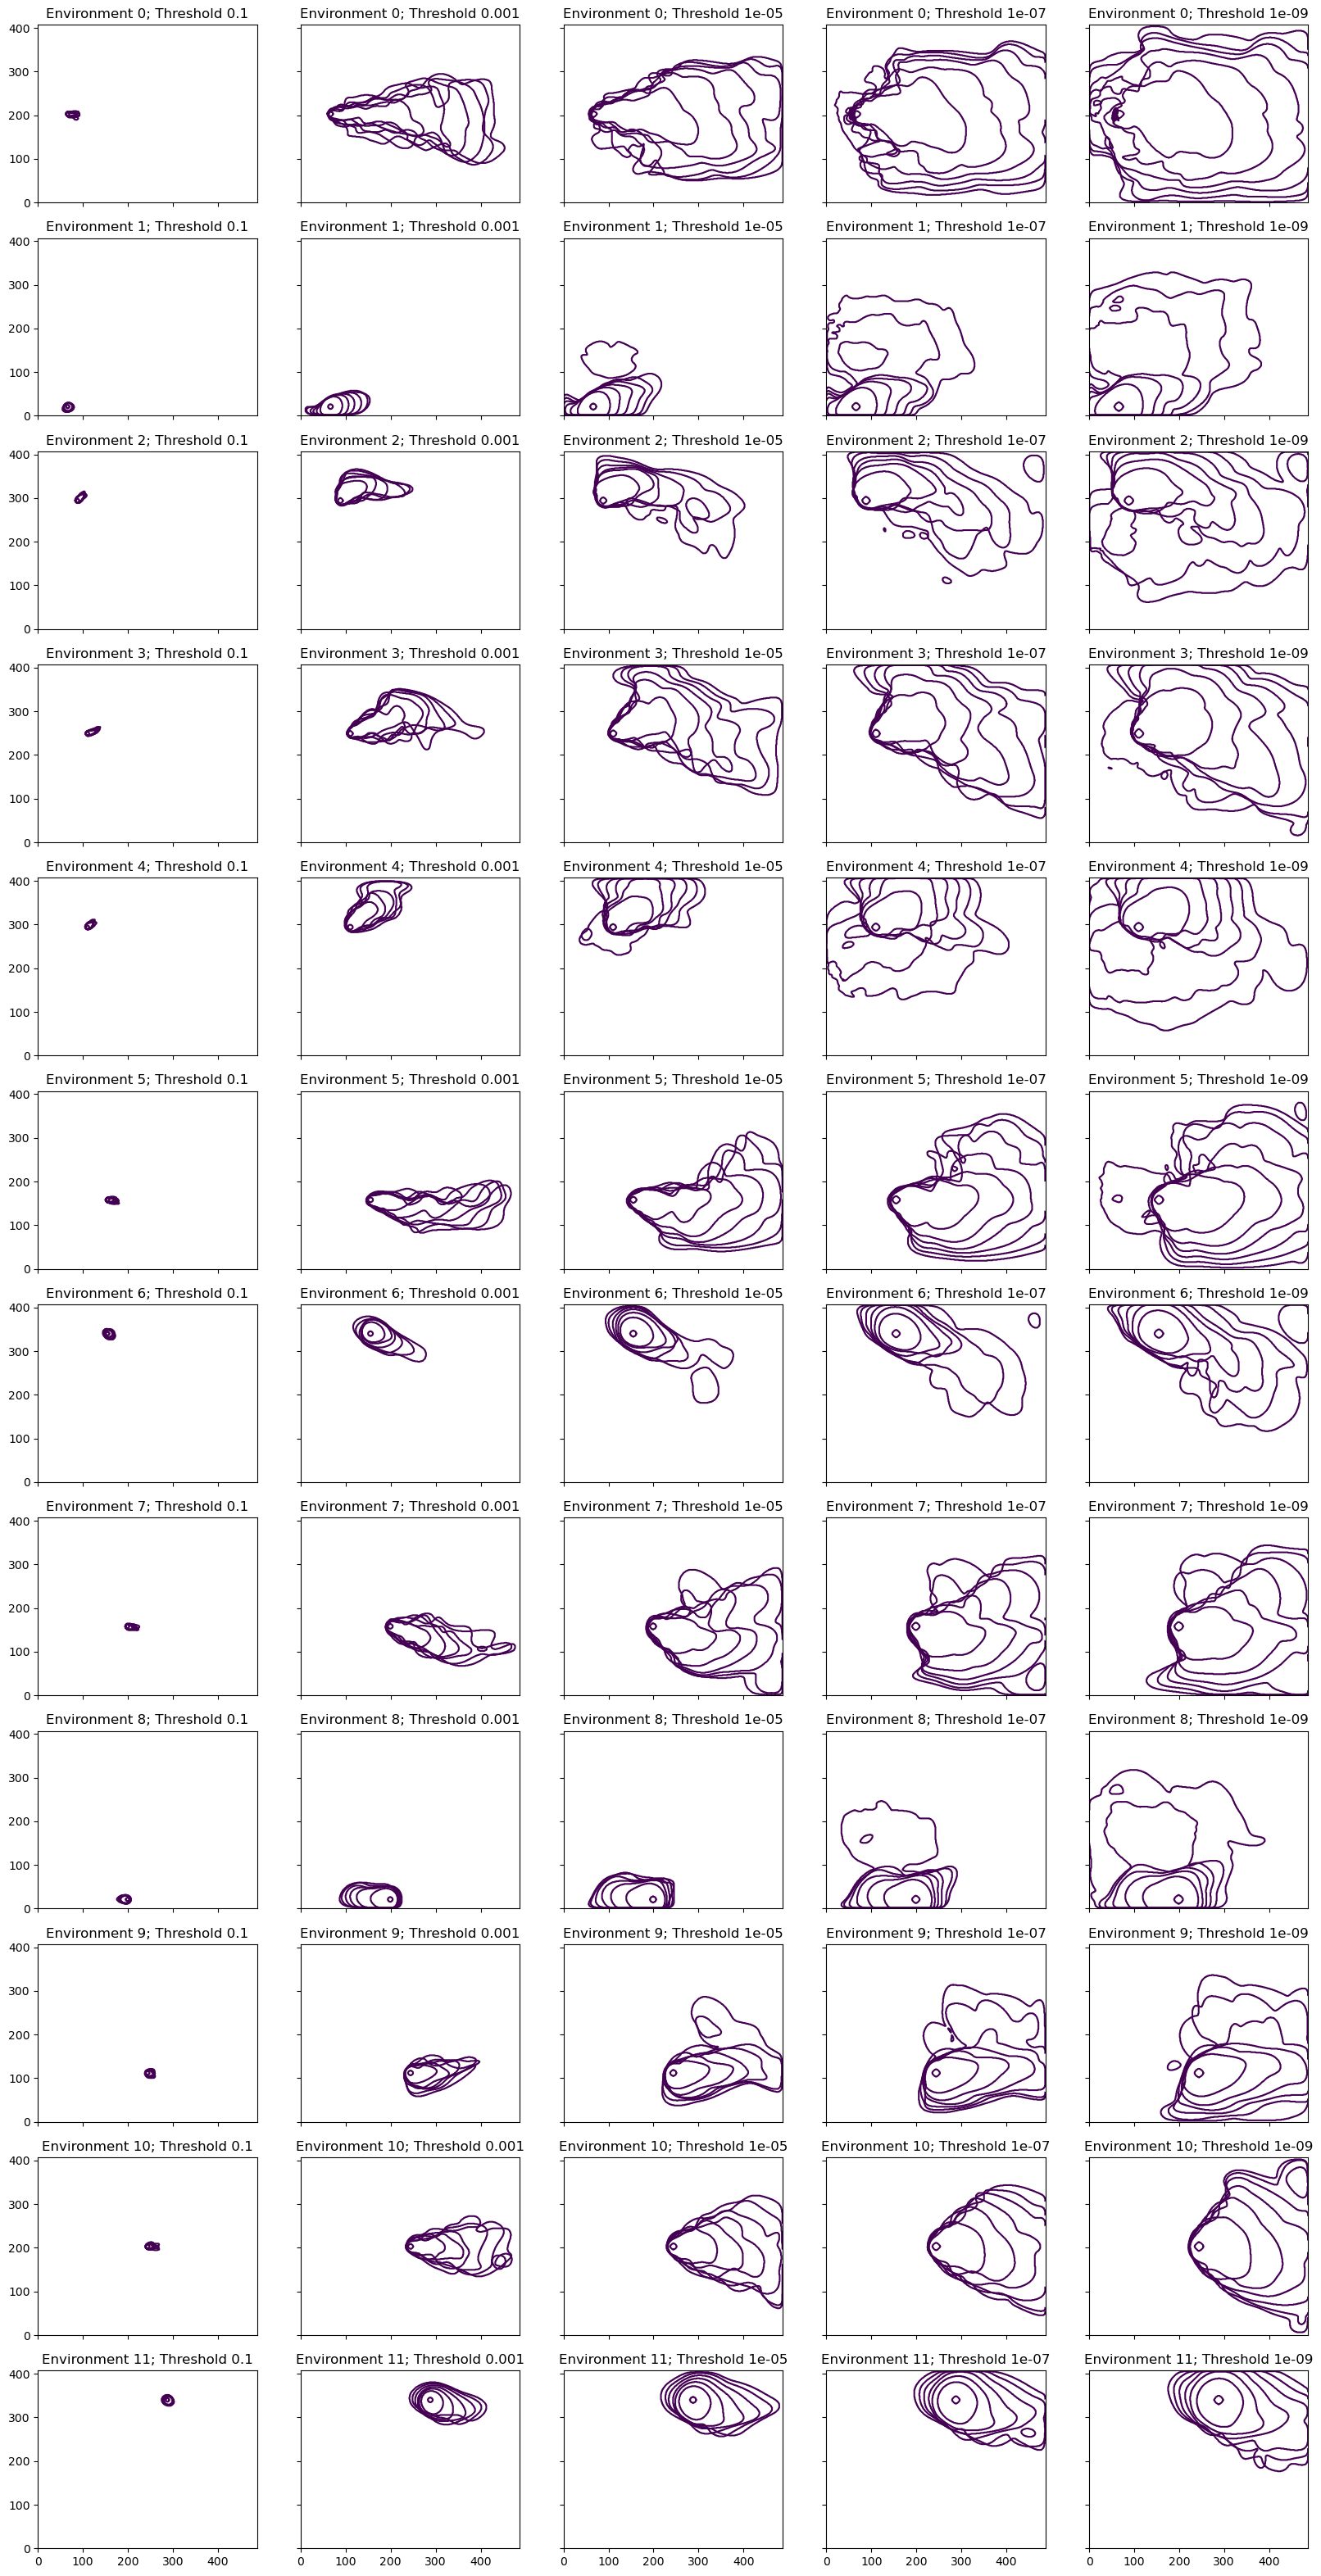

In [23]:
thresholds = [1/10**((i*2) + 1) for i in range(5) ]

fig, axes = plt.subplots(nrows=len(data_arrays),
                         ncols=len(thresholds),
                         figsize=(20,40),
                         sharex=True,
                         sharey=True)

for data_i in range(len(data_arrays)):
    for thresh_i, thresh in enumerate(thresholds):
        ax = axes[data_i, thresh_i]
        plot_env(data_arrays, data_i, thresh, ax)

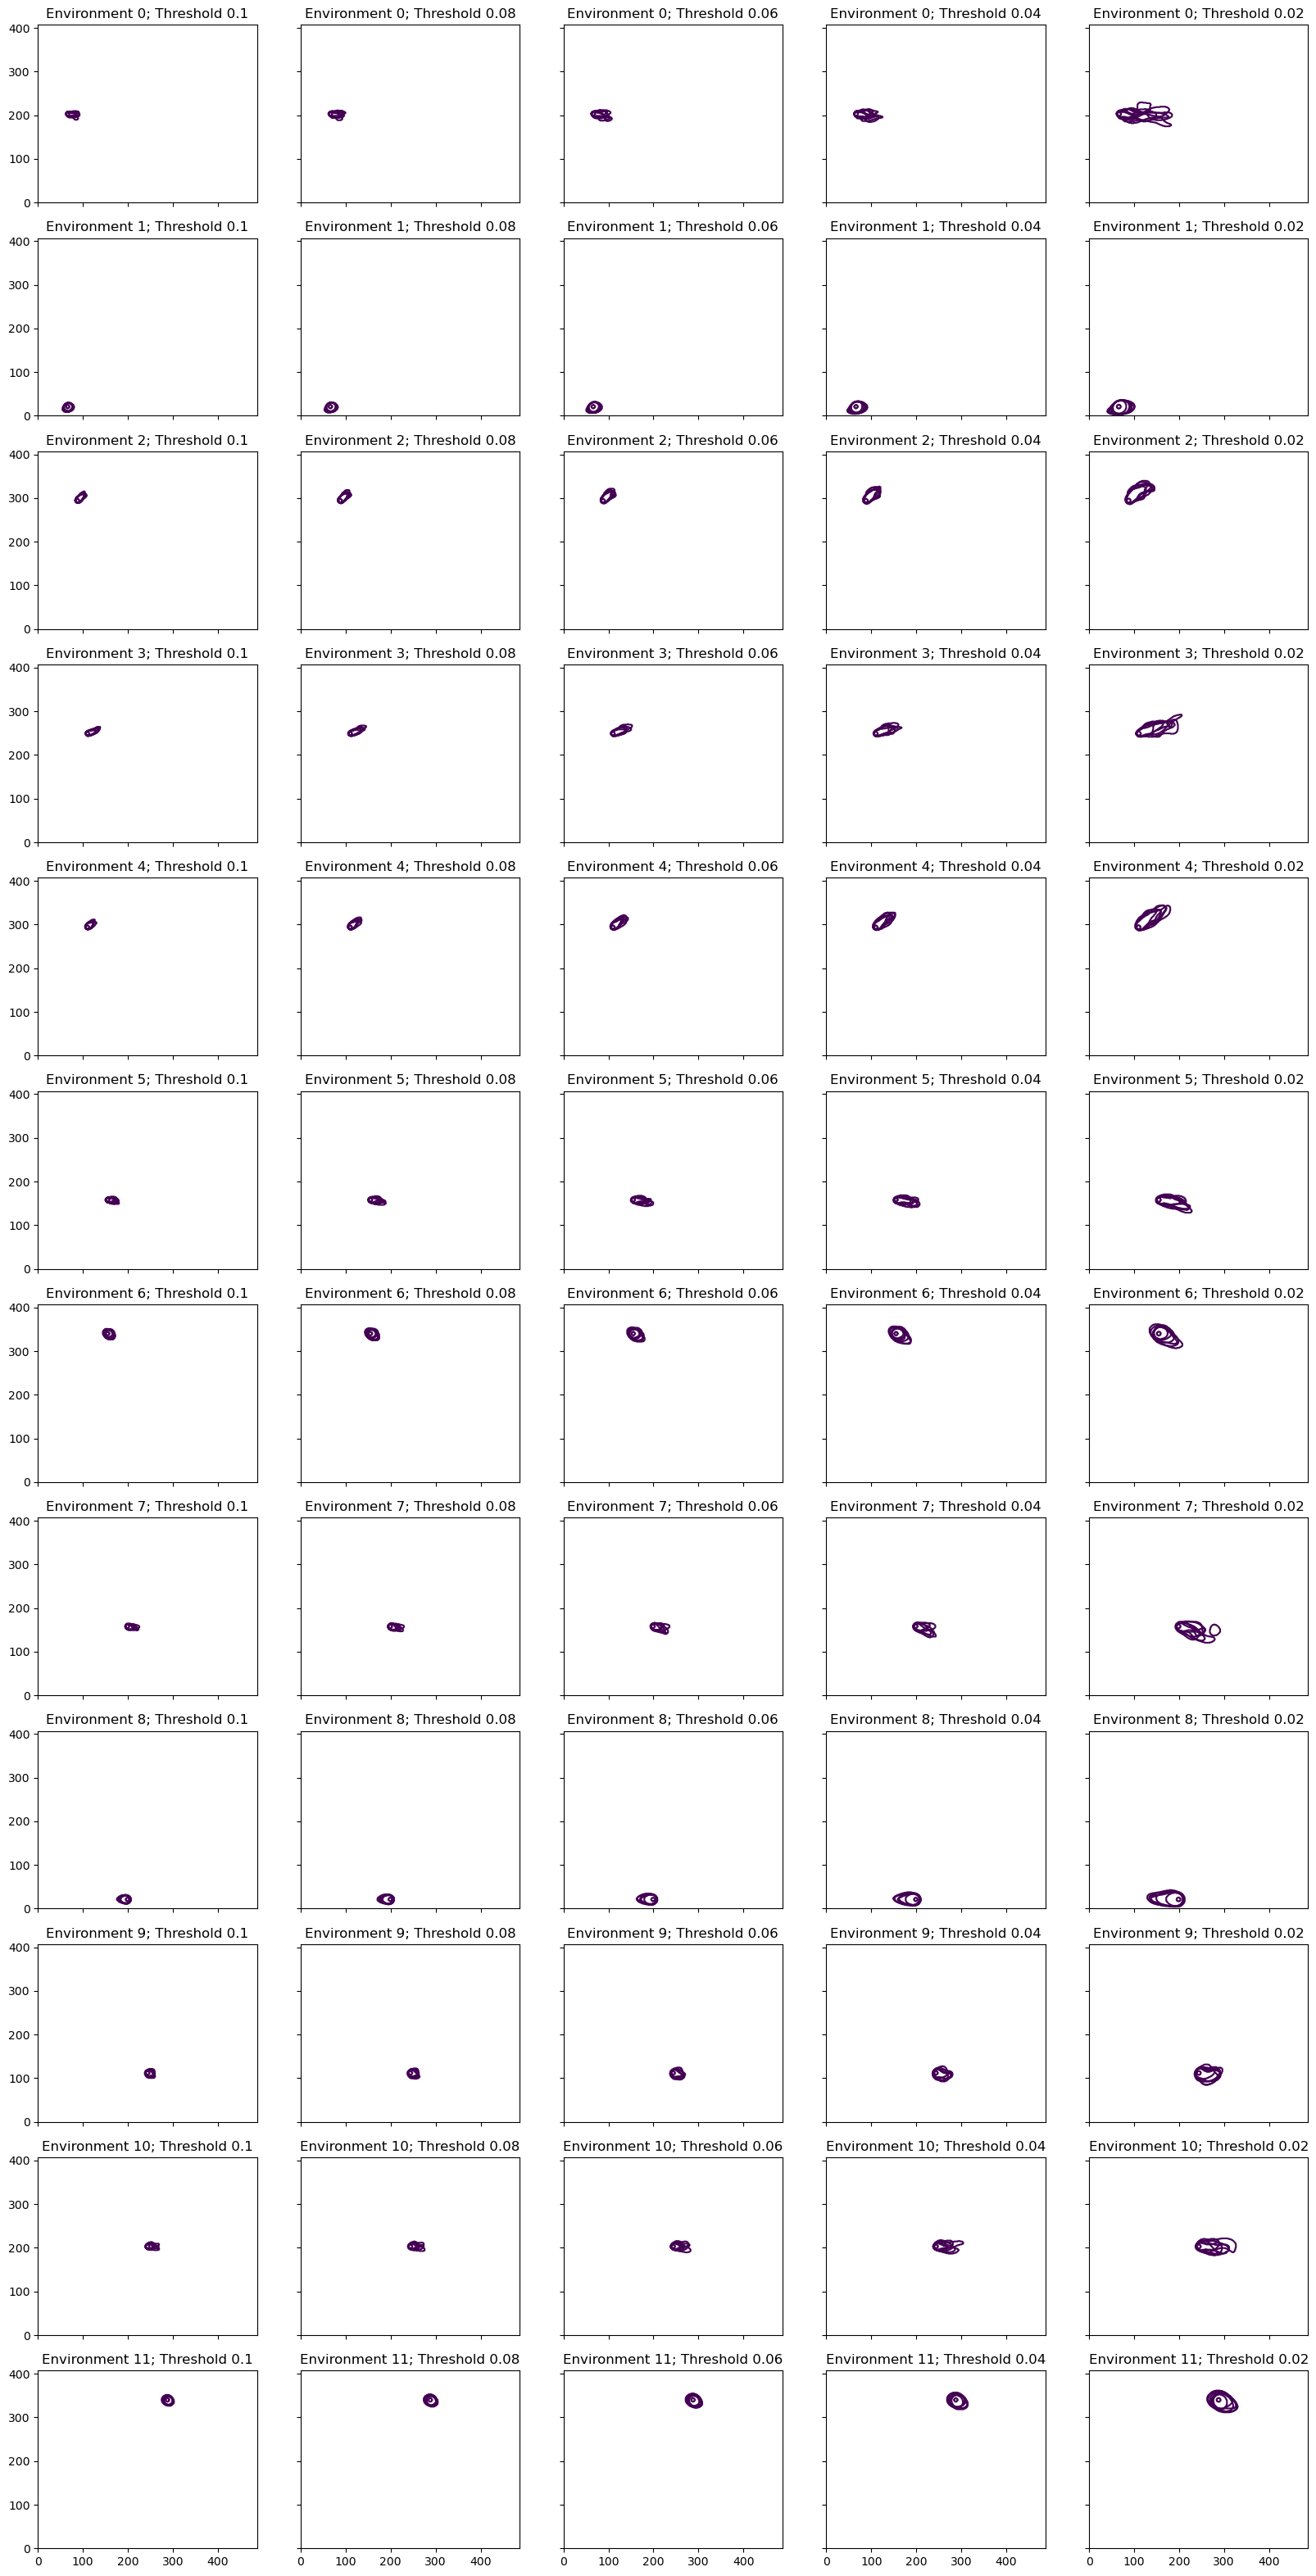

In [26]:
thresholds = (0.02 * (np.arange(5) + 1))[::-1]

fig, axes = plt.subplots(nrows=len(data_arrays),
                         ncols=len(thresholds),
                         figsize=(20,40),
                         sharex=True,
                         sharey=True)

for data_i in range(len(data_arrays)):
    for thresh_i, thresh in enumerate(thresholds):
        ax = axes[data_i, thresh_i]
        plot_env(data_arrays, data_i, thresh, ax)